# Decision Trees & Random Forests

**Group members: Yifeng Lin(Yifeng will finish assignments individually before final project), Yuan Zheng and Ziyang Guo**

## Introduction:  
  
  This is a dataset with more than 73,000 observations, each of which pertains to a particular NY State school district and associated subgroupings categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. In this assignment, we will compare the performance of a decision tree vs. a random forest.

## Data Set Attribute Description  
  
1. report_school_year: Indicates school year for which high school graduation info is being reported 
2. aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated 
3. aggregation_type: Text description of how high school graduation data has been aggregated 
4. nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district 
5. nrc_desc: Text description of the type of school district 
6. county_code: Numeric code for county name 
7. county_name: Full name of applicable NY State county 
8. nyc_ind: Indicates whether or not the school district resides within the borders of NYC 
9. membership_desc: Indicates school year in which students first enrolled in High School 
10. subgroup_code: Numeric code identifying student subgrouping 
11. subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.) 
12. enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year 
13. grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year 
14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year 
15. local_cnt: How many enrolled students of the indicated subgrouping were awarded a "Local" diploma 
16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma 
17. reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma 
18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma 
19. reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma 
20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma 
21. non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non-diploma credential 
22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential 
23. still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled 
24. still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled 
25. ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma 
26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma 
27. dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year 
28. dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year 

## Exploratory Data Analysis:

In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from github
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/Project1_Data.csv')
data

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


In [3]:
data.shape

(73152, 29)

In [4]:
# find out how many missing value
data[data['enroll_cnt']=='-'].shape

(33478, 29)

In [5]:
# replace '-' as NaN 
data = data.replace('-',np.NaN)

In [6]:
# drop missing values
df2=data.dropna(axis=0)

In [7]:
df2.dtypes

report_school_year            object
aggregation_index              int64
aggregation_type              object
aggregation_name              object
nrc_code                       int64
nrc_desc                      object
county_code                    int64
county_name                   object
nyc_ind                        int64
membership_desc               object
subgroup_code                  int64
subgroup_name                 object
enroll_cnt                    object
grad_cnt                      object
grad_pct                      object
local_cnt                     object
local_pct                     object
reg_cnt                       object
reg_pct                       object
reg_adv_cnt                   object
reg_adv_pct                   object
non_diploma_credential_cnt    object
non_diploma_credential_pct    object
still_enr_cnt                 object
still_enr_pct                 object
ged_cnt                       object
ged_pct                       object
d

In [8]:
# transform data types
df2['grad_pct']=df2['grad_pct'].str.strip("%").astype(float)/100;
df2['local_pct']=df2['local_pct'].str.strip("%").astype(float)/100;
df2['reg_pct']=df2['reg_pct'].str.strip("%").astype(float)/100;
df2['reg_adv_pct']=df2['reg_adv_pct'].str.strip("%").astype(float)/100;
df2['non_diploma_credential_pct']=df2['non_diploma_credential_pct'].str.strip("%").astype(float)/100;
df2['still_enr_pct']=df2['still_enr_pct'].str.strip("%").astype(float)/100;
df2['ged_pct']=df2['ged_pct'].str.strip("%").astype(float)/100;
df2['dropout_pct']=df2['dropout_pct'].str.strip("%").astype(float)/100;

<ipython-input-8-6d4635d9c569>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['grad_pct']=df2['grad_pct'].str.strip("%").astype(float)/100;
<ipython-input-8-6d4635d9c569>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['local_pct']=df2['local_pct'].str.strip("%").astype(float)/100;
<ipython-input-8-6d4635d9c569>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [9]:
# transform data types
df2['enroll_cnt']=df2['enroll_cnt'].astype(float)
df2['grad_cnt']=df2['grad_cnt'].astype(float)
df2['local_cnt']=df2['local_cnt'].astype(float)
df2['reg_cnt']=df2['reg_cnt'].astype(float)
df2['reg_adv_cnt']=df2['reg_adv_cnt'].astype(float)
df2['non_diploma_credential_cnt']=df2['non_diploma_credential_cnt'].astype(float)
df2['still_enr_cnt']=df2['still_enr_cnt'].astype(float)
df2['ged_cnt']=df2['ged_cnt'].astype(float)
df2['dropout_cnt']=df2['dropout_cnt'].astype(float)

<ipython-input-9-272d2c64bec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['enroll_cnt']=df2['enroll_cnt'].astype(float)
<ipython-input-9-272d2c64bec2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['grad_cnt']=df2['grad_cnt'].astype(float)
<ipython-input-9-272d2c64bec2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [10]:
df_cat=df2.iloc[:,:12]
df_num=df2.iloc[:,12:]

In [11]:
# turn the name of each columns into list
column_cat=df_cat.columns.to_list()
column_num=df_num.columns.to_list()

<ipython-input-12-f5bee7815511>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


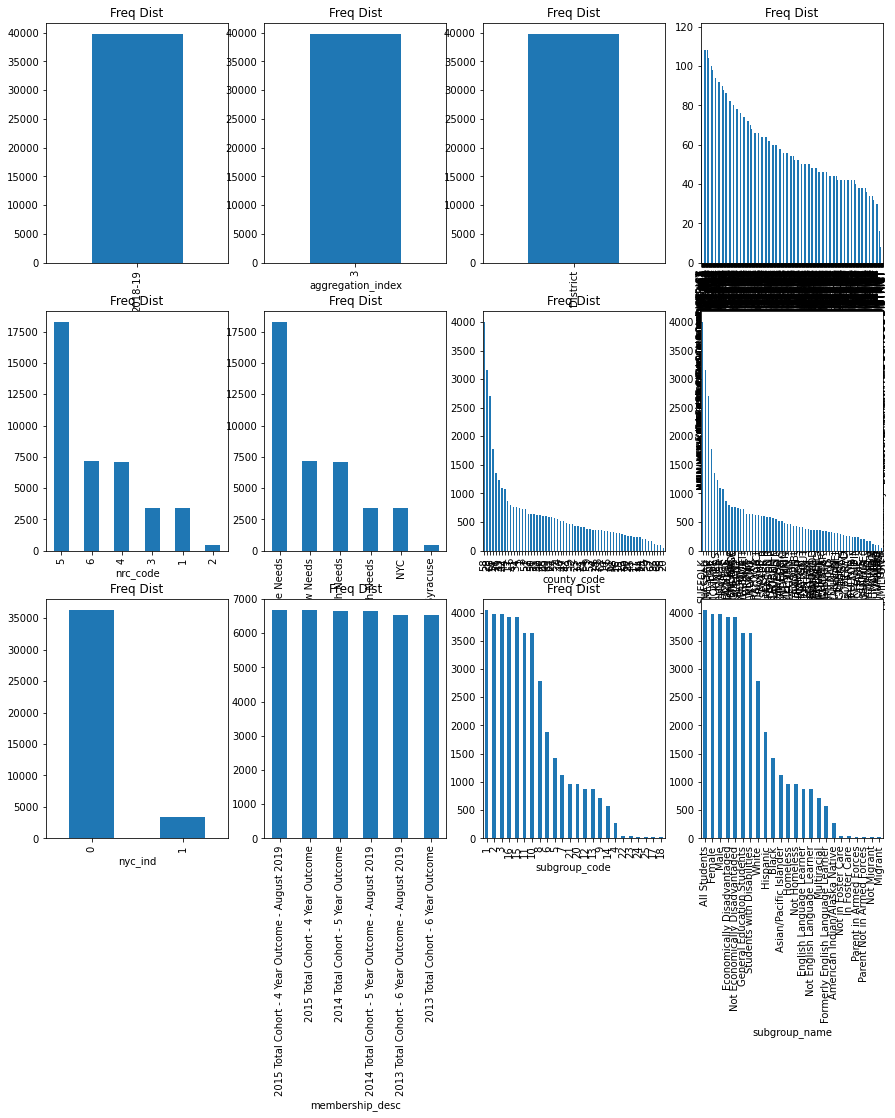

In [12]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(3,4,i+1)
    df_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

As shown in the above bar charts, we found that the first three feature have only one value, and the type of school district mostly gathered at the 'Average Needs', the 'Buffalo Rochester Yonkers Syracuse is the least. As for the index of 'nyc_ind', we know that most school district not located in New York, and only nearly a liitle part of school resides within the borders of NYC. 

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

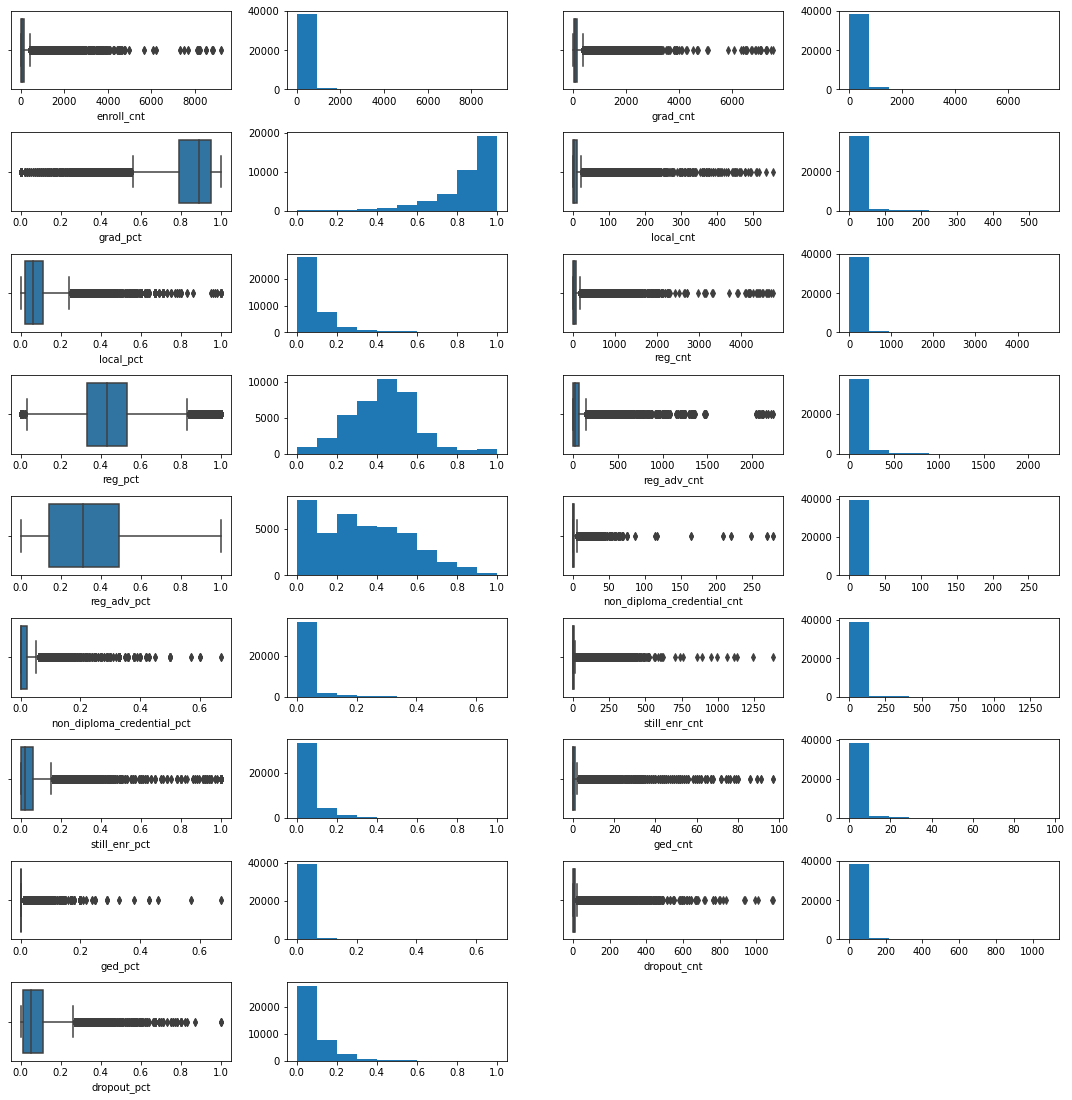

In [13]:
# show hist plot and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(17):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(df_num[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(df_num[column_num[i]])
    
plt.tight_layout()

## Data Preparation:

In data preparation we will add the "reg_pct_level". And after that we will finish the standardization of numerical attribtes.

In [14]:
reg=df2['reg_pct'].values.tolist()

In [15]:
# extract the median percentage of 'reg_pct'
reg.sort()
mid = int(len(reg) / 2)
if len(reg) % 2 == 0:
    median = (reg[mid-1] + reg[mid]) / 2.0
else:
    median = reg[mid]
print("The median percentage of reg_pct is",median)

The median percentage of reg_pct is 0.43


In [16]:
# Create a new categorical variable 
def func(x):
    if x < 0.5*median:
        return "low"
    elif 0.5*median<x <1.5*median :
        return "medium"   
    else:
        return 'high'  

df2['reg_pct_level'] = df2['reg_pct'].apply(func)

<ipython-input-16-a9a06e952d1c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reg_pct_level'] = df2['reg_pct'].apply(func)


In [17]:
# drop 'reg_pct' and 'reg_cnt'
df2.drop(['reg_pct','reg_cnt'],axis=1,inplace=True)

D:\python\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df2.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0.14,16.0,0.02,30.0,0.05,0.0,0.0,148.0,0.22,medium
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0.15,2.0,0.01,11.0,0.03,0.0,0.0,65.0,0.20,medium
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0.13,14.0,0.04,19.0,0.06,0.0,0.0,83.0,0.25,medium
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0.06,10.0,0.03,18.0,0.05,0.0,0.0,91.0,0.25,medium
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0.05,4.0,0.04,8.0,0.08,0.0,0.0,28.0,0.29,medium


In [19]:
# reset index for further use
df2 = df2.reset_index(drop = True)

In [20]:
df2.iloc[:,12:]

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level
0,658.0,464.0,0.71,63.0,0.10,91.0,0.14,16.0,0.02,30.0,0.05,0.0,0.0,148.0,0.22,medium
1,324.0,246.0,0.76,30.0,0.09,47.0,0.15,2.0,0.01,11.0,0.03,0.0,0.0,65.0,0.20,medium
2,334.0,218.0,0.65,33.0,0.10,44.0,0.13,14.0,0.04,19.0,0.06,0.0,0.0,83.0,0.25,medium
3,367.0,248.0,0.68,42.0,0.11,23.0,0.06,10.0,0.03,18.0,0.05,0.0,0.0,91.0,0.25,medium
4,98.0,58.0,0.59,13.0,0.13,5.0,0.05,4.0,0.04,8.0,0.08,0.0,0.0,28.0,0.29,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,36.0,25.0,0.69,2.0,0.06,3.0,0.08,1.0,0.03,1.0,0.03,0.0,0.0,9.0,0.25,medium
39670,48.0,43.0,0.90,3.0,0.06,8.0,0.17,0.0,0.00,0.0,0.00,0.0,0.0,5.0,0.10,high
39671,13.0,2.0,0.15,0.0,0.00,0.0,0.00,3.0,0.23,2.0,0.15,0.0,0.0,6.0,0.46,low
39672,33.0,23.0,0.70,0.0,0.00,3.0,0.09,3.0,0.09,0.0,0.00,0.0,0.0,7.0,0.21,medium


In [21]:
# load stadardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
# finish standardization
scaler = StandardScaler()
scaler.fit(df2[['enroll_cnt','grad_cnt','grad_pct','local_cnt','local_pct','reg_adv_cnt','reg_adv_pct','non_diploma_credential_cnt','non_diploma_credential_pct','still_enr_cnt','still_enr_pct','ged_cnt','ged_pct','dropout_cnt','dropout_pct']])
df2_nums = pd.DataFrame(scaler.transform(df2[['enroll_cnt','grad_cnt','grad_pct','local_cnt','local_pct','reg_adv_cnt','reg_adv_pct','non_diploma_credential_cnt','non_diploma_credential_pct','still_enr_cnt','still_enr_pct','ged_cnt','ged_pct','dropout_cnt','dropout_pct']]),columns = ['enroll_cnt','grad_cnt','grad_pct','local_cnt','local_pct','reg_adv_cnt','reg_adv_pct','non_diploma_credential_cnt','non_diploma_credential_pct','still_enr_cnt','still_enr_pct','ged_cnt','ged_pct','dropout_cnt','dropout_pct'])
df2_nums

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,1.058898,0.838167,-0.855052,1.580829,0.146183,0.218166,-0.807673,2.165853,0.063331,0.458726,-0.021591,-0.278336,-0.308596,2.628424,1.453315
1,0.299750,0.234774,-0.536160,0.551056,0.050014,-0.113219,-0.764196,0.011620,-0.182736,-0.007347,-0.248025,-0.278336,-0.308596,0.972702,1.246245
2,0.322479,0.157274,-1.237722,0.644672,0.146183,-0.135813,-0.851149,1.858106,0.555465,0.188894,0.091626,-0.278336,-0.308596,1.331774,1.763920
3,0.397484,0.240310,-1.046387,0.925519,0.242352,-0.293974,-1.155485,1.242610,0.309398,0.164364,-0.021591,-0.278336,-0.308596,1.491362,1.763920
4,-0.213925,-0.285583,-1.620392,0.020567,0.434690,-0.429540,-1.198962,0.319367,0.555465,-0.080938,0.318060,-0.278336,-0.308596,0.234609,2.178059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,-0.354845,-0.376922,-0.982608,-0.322690,-0.238493,-0.444603,-1.068532,-0.142254,0.309398,-0.252649,-0.248025,-0.278336,-0.308596,-0.144411,1.763920
39670,-0.327570,-0.327101,0.356737,-0.291485,-0.238493,-0.406946,-0.677243,-0.296128,-0.428803,-0.277179,-0.587676,-0.278336,-0.308596,-0.224205,0.210896
39671,-0.407122,-0.440583,-4.426639,-0.385101,-0.815507,-0.467198,-1.416344,0.165494,5.230735,-0.228119,1.110579,-0.278336,-0.308596,-0.204257,3.938153
39672,-0.361664,-0.382458,-0.918830,-0.385101,-0.815507,-0.444603,-1.025055,0.165494,1.785799,-0.277179,-0.587676,-0.278336,-0.308596,-0.184308,1.349780


In [22]:
df2['enroll_cnt'] = df2_nums['enroll_cnt']
df2['grad_cnt'] = df2_nums['grad_cnt']
df2['grad_pct'] = df2_nums['grad_pct']
df2['local_cnt'] = df2_nums['local_cnt']
df2['local_pct'] = df2_nums['local_pct']
df2['reg_adv_cnt'] = df2_nums['reg_adv_cnt']
df2['reg_adv_pct'] = df2_nums['reg_adv_pct']
df2['non_diploma_credential_cnt'] = df2_nums['non_diploma_credential_cnt']
df2['non_diploma_credential_pct'] = df2_nums['non_diploma_credential_pct']
df2['still_enr_cnt'] = df2_nums['still_enr_cnt']
df2['still_enr_pct'] = df2_nums['still_enr_pct']
df2['ged_cnt'] = df2_nums['ged_cnt']
df2['ged_pct'] = df2_nums['ged_pct']
df2['dropout_cnt'] = df2_nums['dropout_cnt']
df2['dropout_pct'] = df2_nums['dropout_pct']

In [23]:
df2

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,reg_pct_level
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-0.807673,2.165853,0.063331,0.458726,-0.021591,-0.278336,-0.308596,2.628424,1.453315,medium
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-0.764196,0.011620,-0.182736,-0.007347,-0.248025,-0.278336,-0.308596,0.972702,1.246245,medium
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-0.851149,1.858106,0.555465,0.188894,0.091626,-0.278336,-0.308596,1.331774,1.763920,medium
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-1.155485,1.242610,0.309398,0.164364,-0.021591,-0.278336,-0.308596,1.491362,1.763920,medium
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-1.198962,0.319367,0.555465,-0.080938,0.318060,-0.278336,-0.308596,0.234609,2.178059,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-1.068532,-0.142254,0.309398,-0.252649,-0.248025,-0.278336,-0.308596,-0.144411,1.763920,medium
39670,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-0.677243,-0.296128,-0.428803,-0.277179,-0.587676,-0.278336,-0.308596,-0.224205,0.210896,high
39671,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-1.416344,0.165494,5.230735,-0.228119,1.110579,-0.278336,-0.308596,-0.204257,3.938153,low
39672,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-1.025055,0.165494,1.785799,-0.277179,-0.587676,-0.278336,-0.308596,-0.184308,1.349780,medium


In [24]:
# draw a heatmap to show the correlation between response variable and other variables
def draw_heatmap(data):
    ylabels = data.columns.values.tolist()


    df = pd.DataFrame(data)

    dfData = df.corr()
    plt.subplots(figsize=(15, 15)) 
    sns.heatmap(dfData, annot=True, vmax=1, square=True,yticklabels=ylabels,xticklabels=ylabels, cmap="RdBu") 
    plt.show()

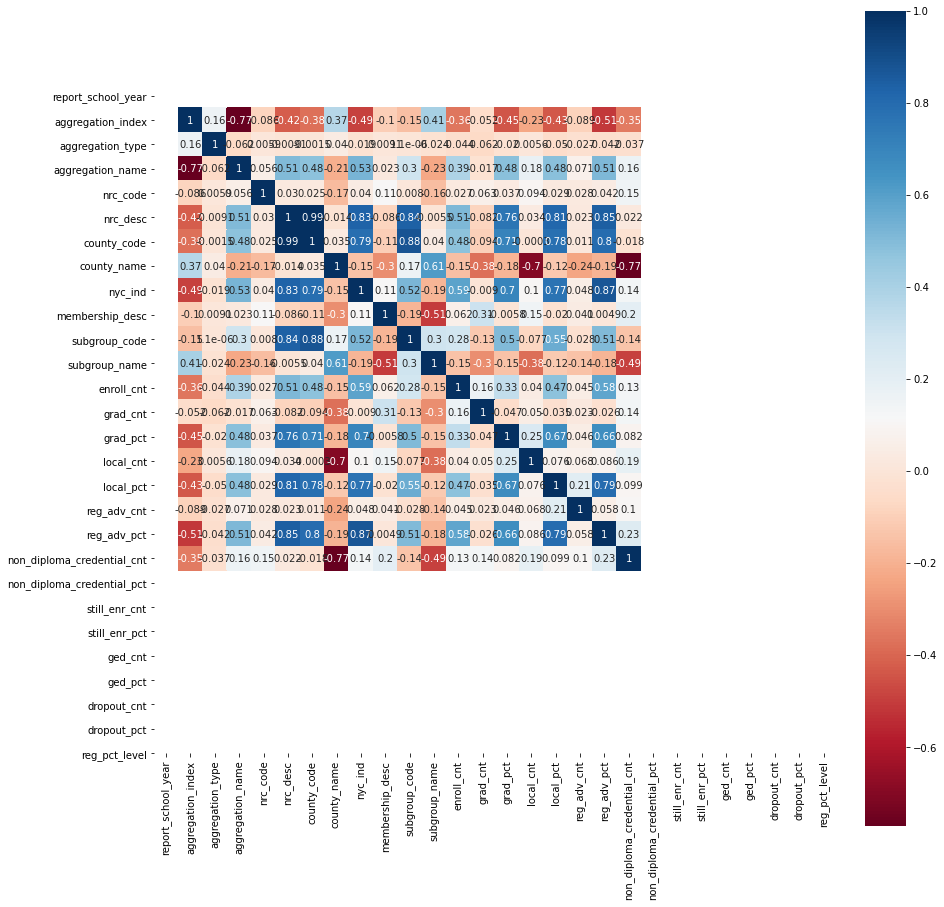

In [25]:
draw_heatmap(df2)

As shown in the above heat map, we can see that the 'grad_pct' and 'reg_adv_pct' have a significant negative correlation between these two variables and the response variable. And the 'reg_cnt' and 'reg_adv_cnt' might be not so significant to the response variable.

## Prepared Data Review:

In [26]:
df2_cat=df2.iloc[:,:12]
df2_num=df2.iloc[:,12:27]

In [27]:
# turn the name of each columns into list
column_cat2 = df2_cat.columns.to_list()
column_num2 = df2_num.columns.to_list()

In [28]:
# remove the features with only one value
df2_cat.drop([column_cat2[0],column_cat2[1],column_cat2[2]],axis=1,inplace=True)

In [29]:
column_cat2=df2_cat.columns.to_list()

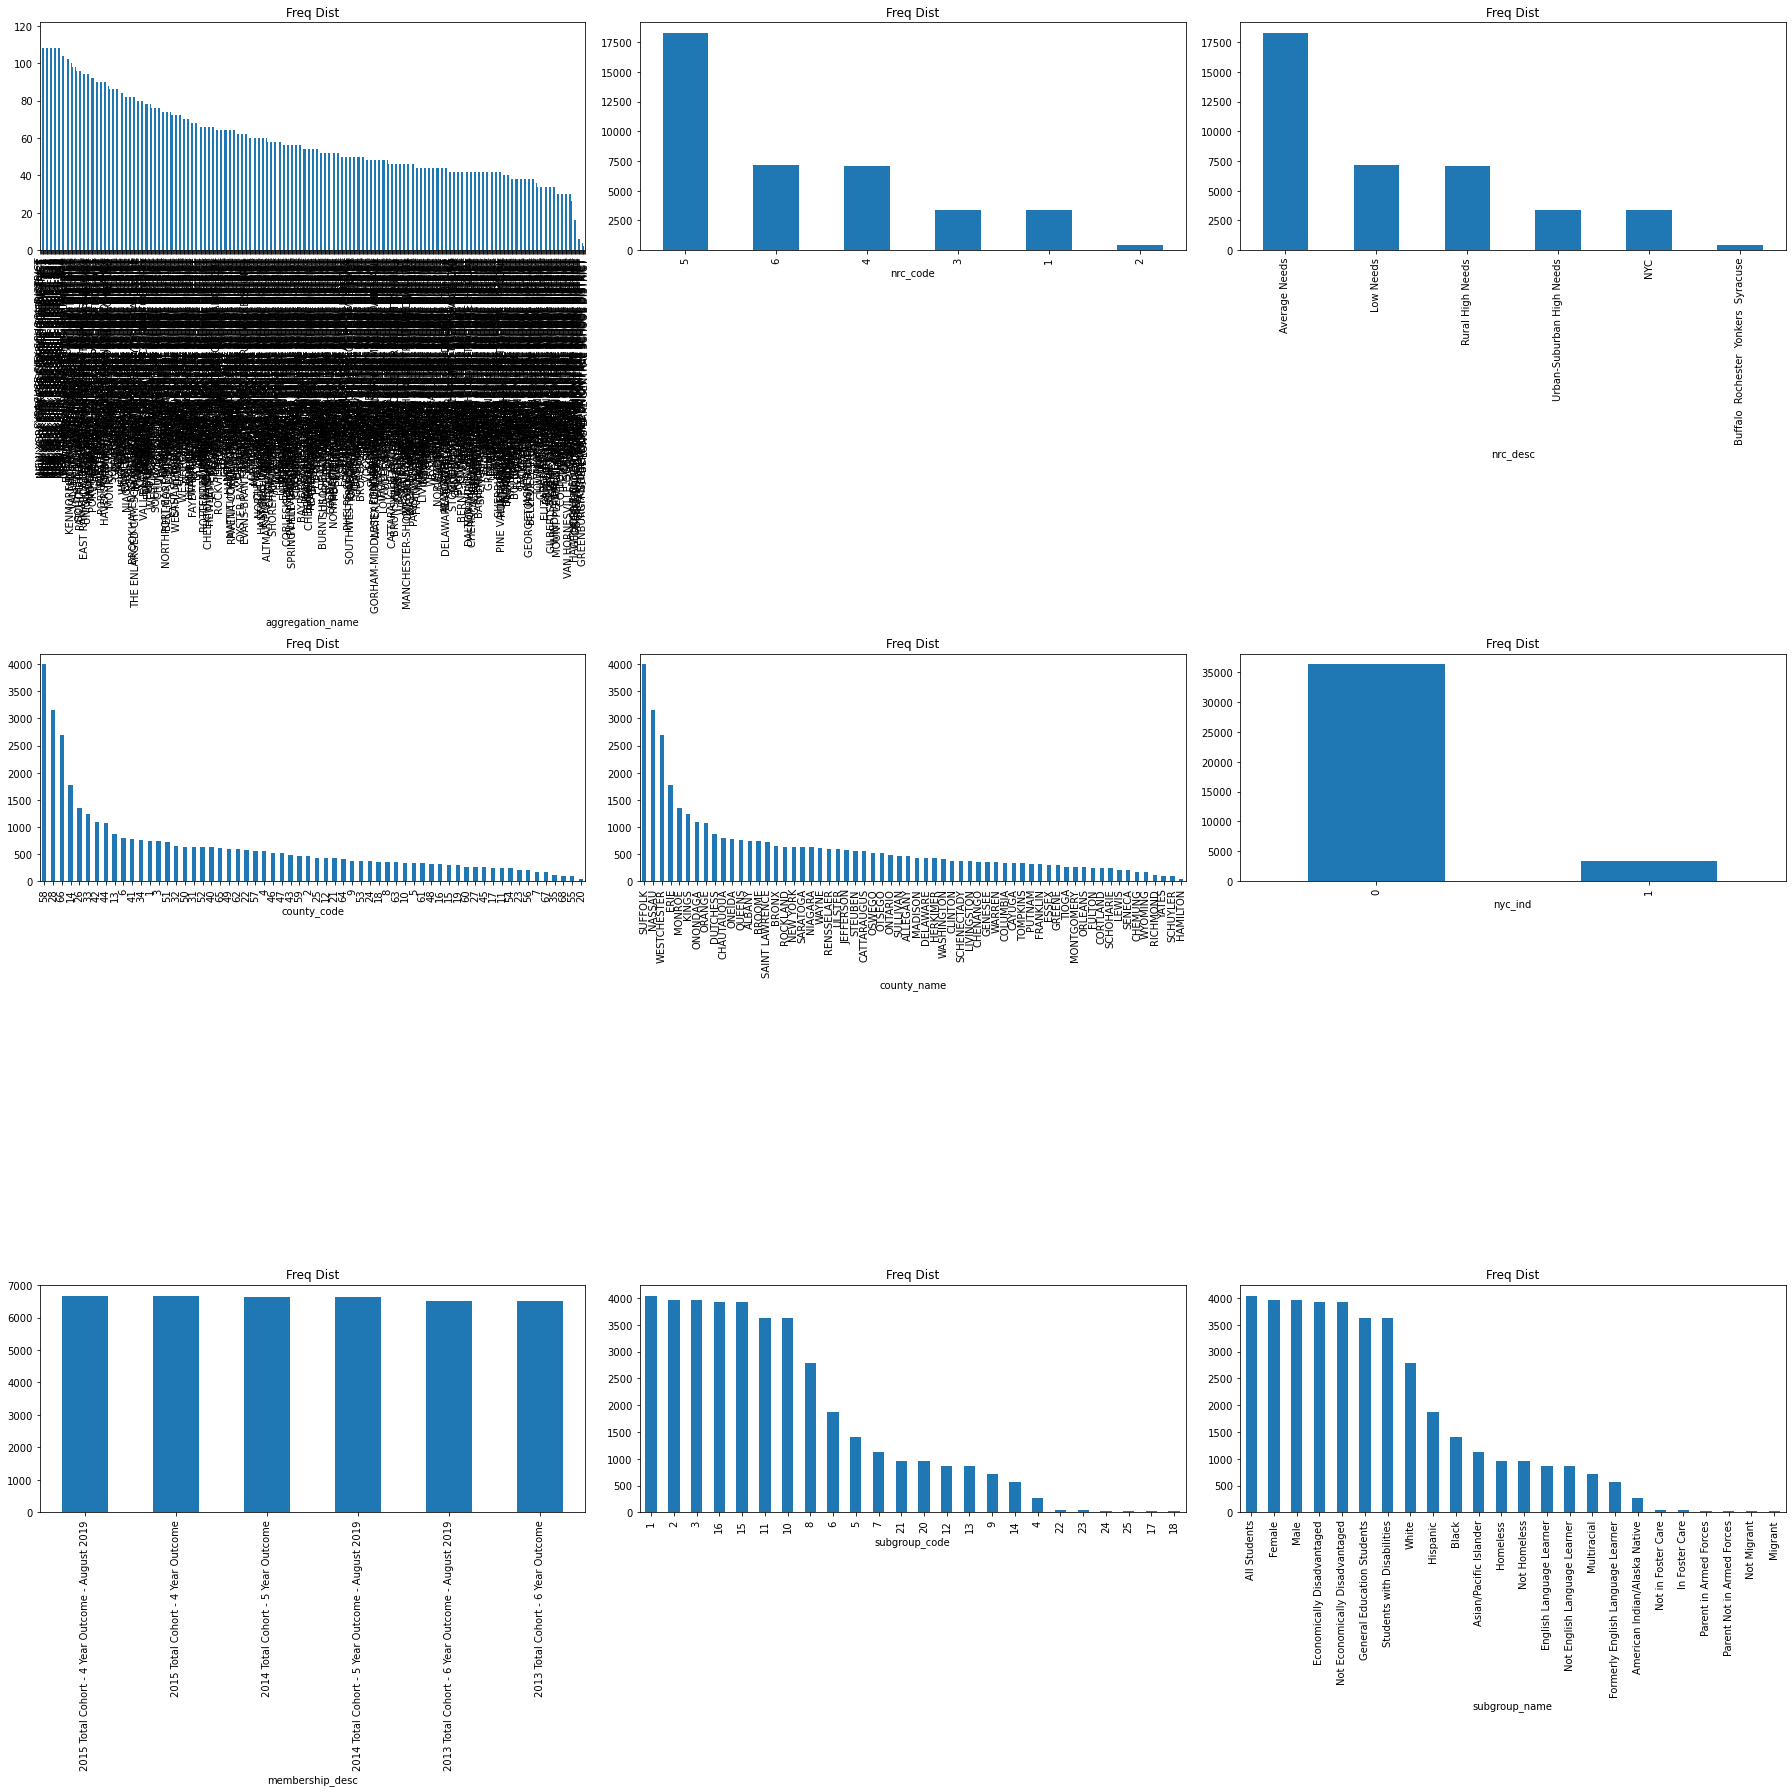

In [30]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(25,25))
for i in range(9):
    plt.subplot(3,3,i+1)
    df2_cat[column_cat2[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat2[i])
plt.tight_layout()

<AxesSubplot:title={'center':'Freq Dist'}>

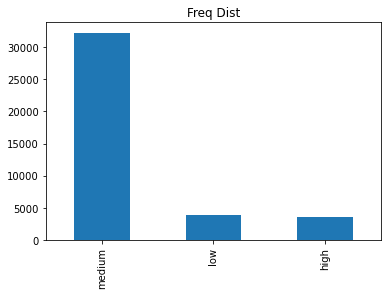

In [31]:
df2['reg_pct_level'].value_counts().plot.bar(title = "Freq Dist")

As shown in the above bar chart, the type of medium takes a lot of parts and the 'low' and 'high'

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

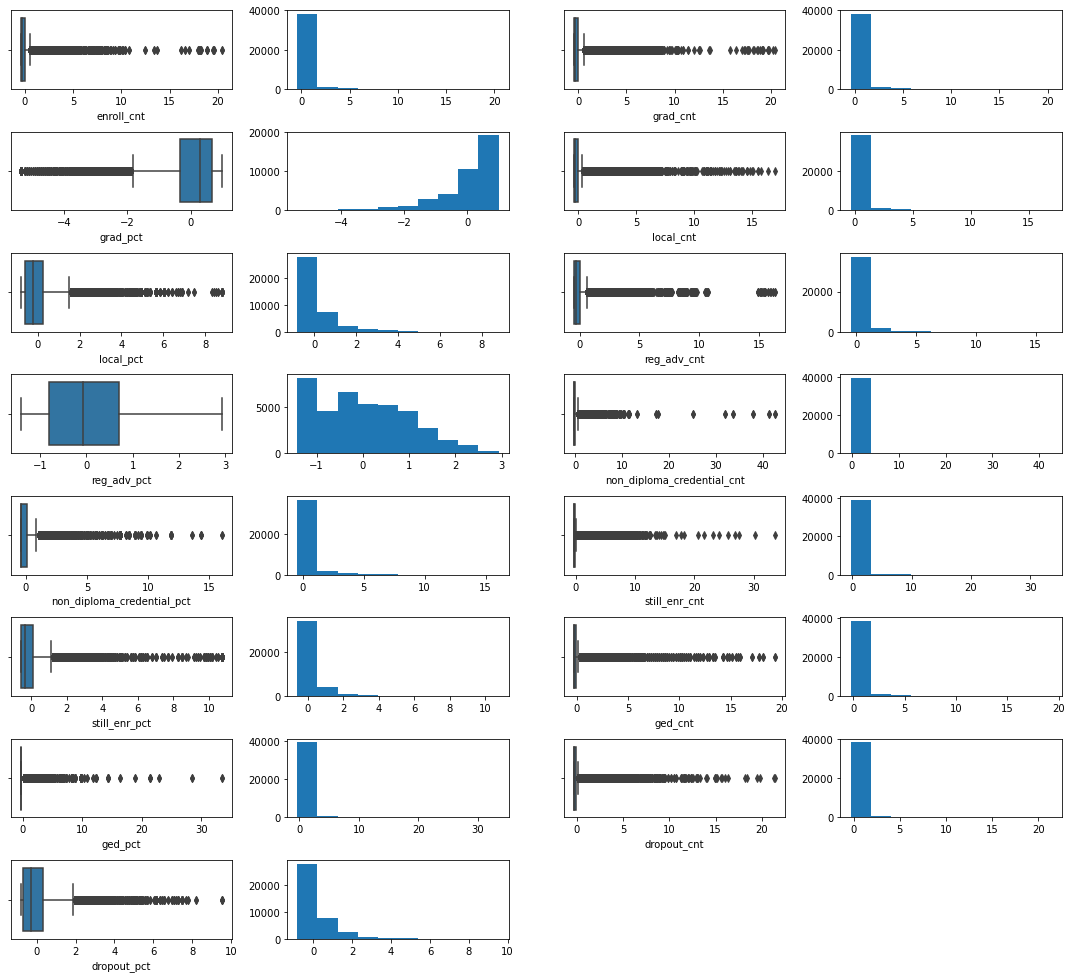

In [32]:
# show hist plot and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(15):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(df2_num[column_num2[i]])
    plt.subplot(12,4,n+2)
    plt.hist(df2_num[column_num2[i]])
    
plt.tight_layout()

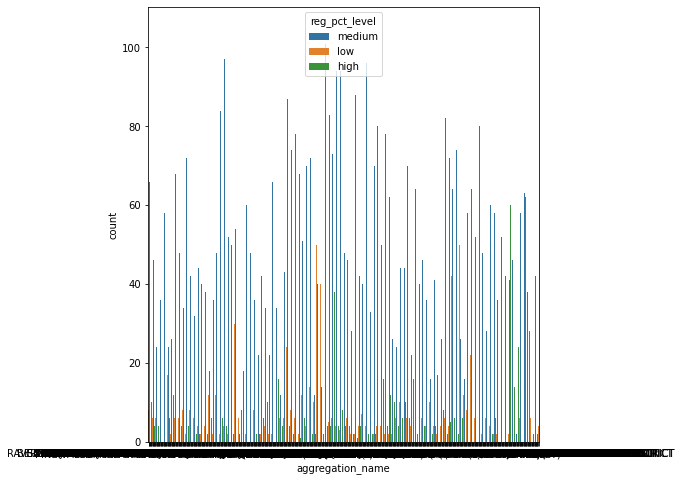

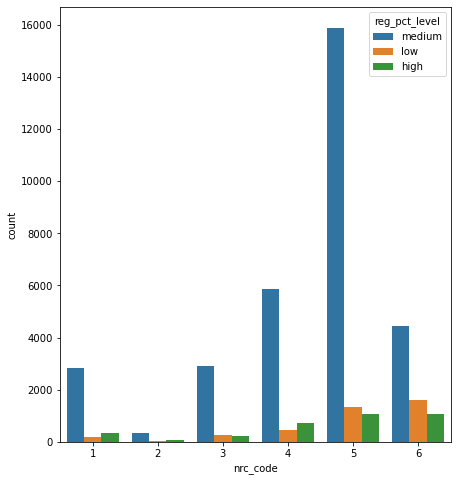

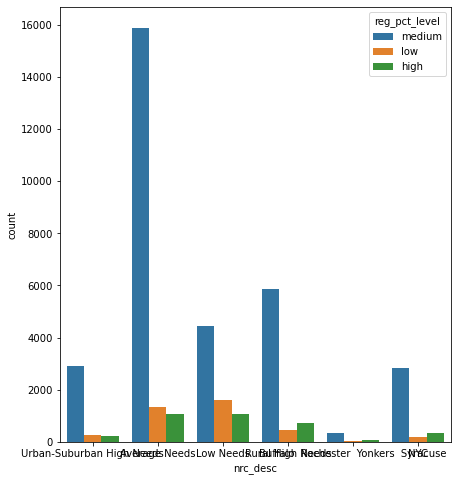

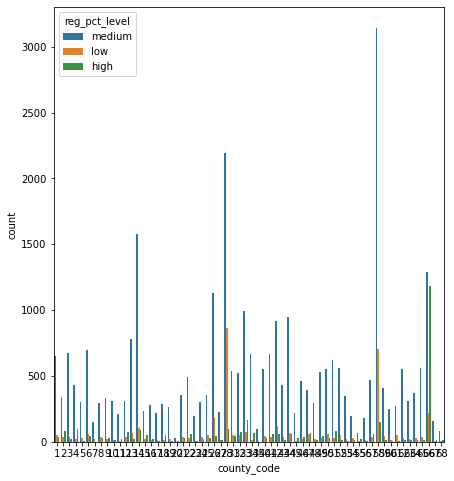

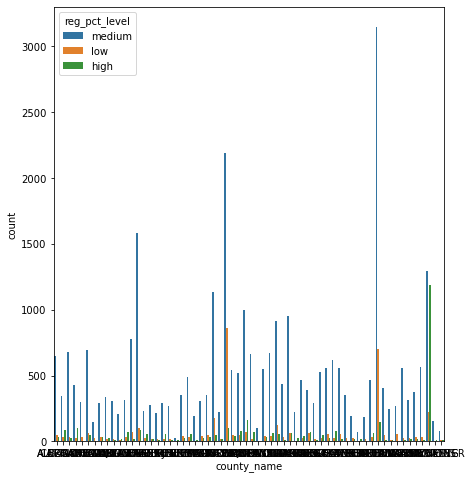

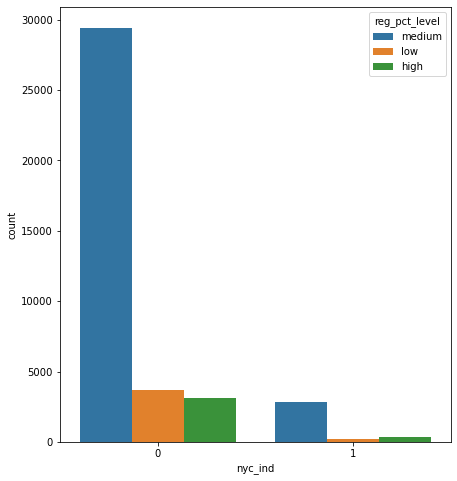

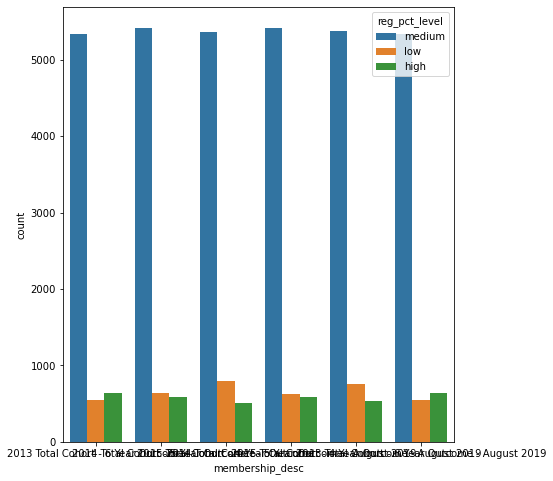

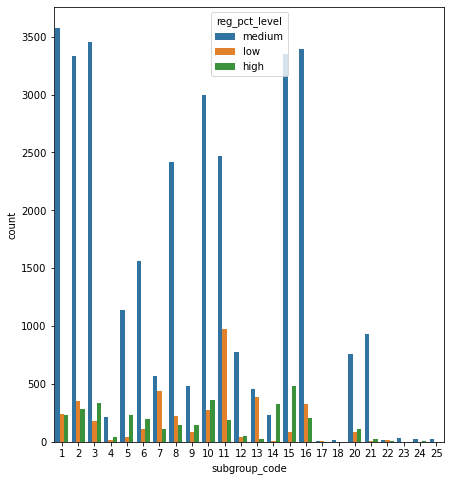

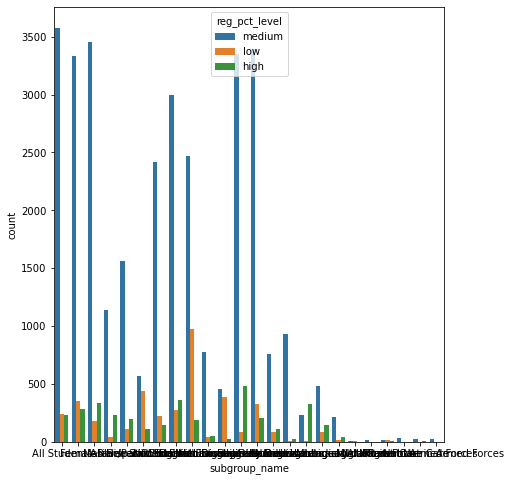

In [33]:
#show the countplot between categorical attributes and response variable
for col in column_cat2:
    plt.figure(figsize=(7,8))
    sns.countplot(x=col,hue='reg_pct_level',data=df2)

According to the above count plot, we can see the relationship between numerical attributes and response variable can be:
- In the chart of 'nrc_code', we know there are nearly 16000 medium 'reg_pct_level' in the type of '5' school district. The type of '2' school  district has the lowest number
- In the chart of 'nyc_ind', it tells us that most students studied not in NYC and the medium 'reg_pct_level' students have taken most part. 
- In the above charts, we can know that the medium 'reg_pct_level' has taken most part.


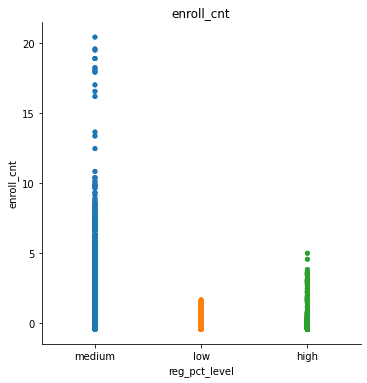

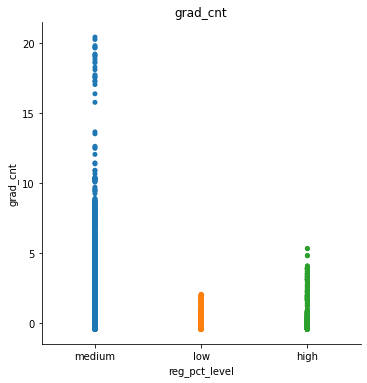

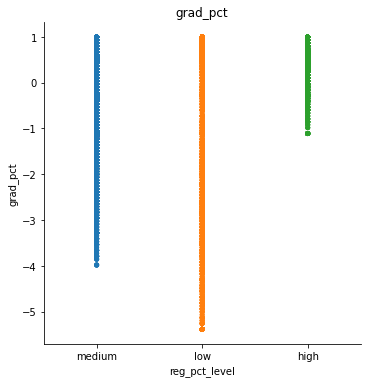

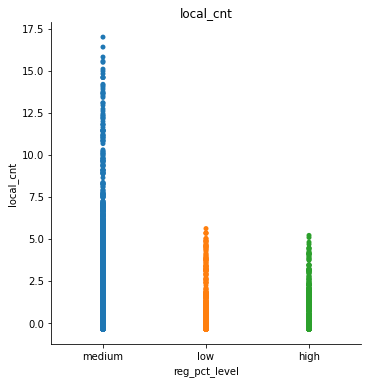

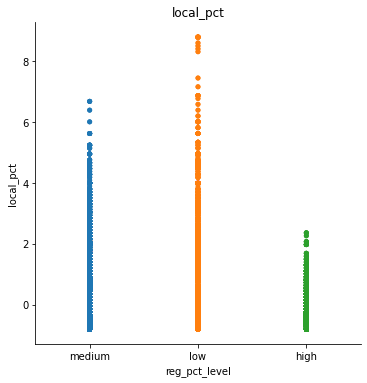

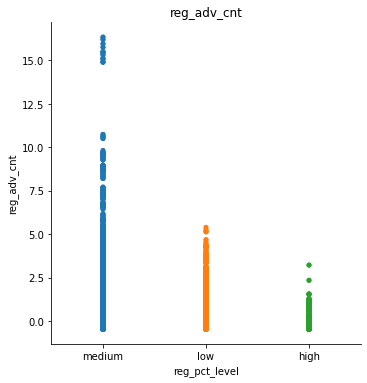

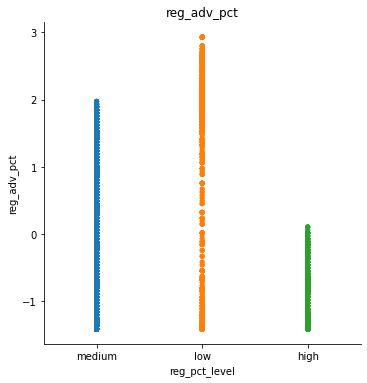

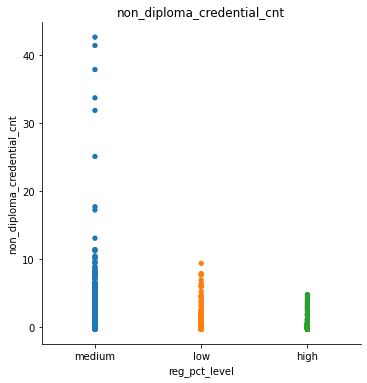

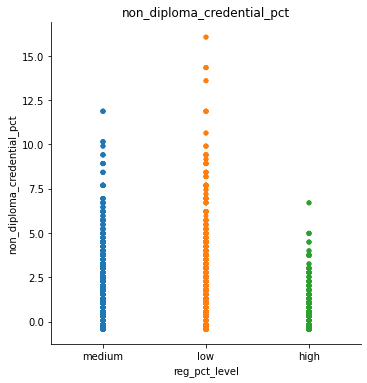

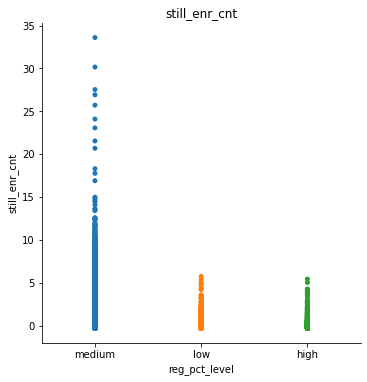

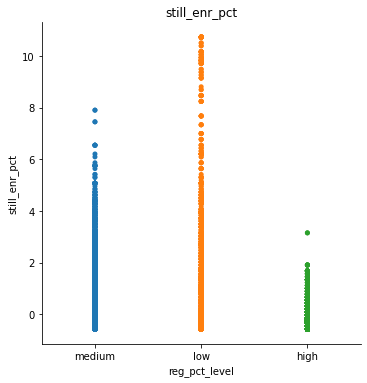

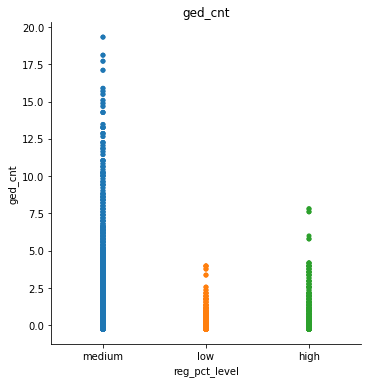

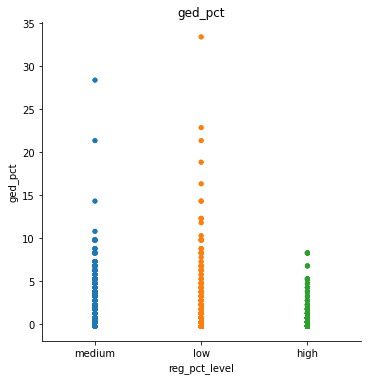

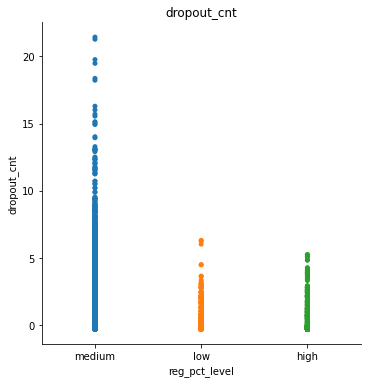

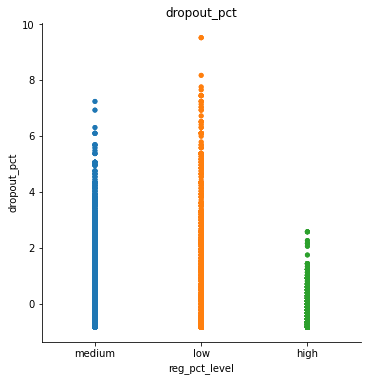

In [34]:
#show the catplot between numercial attributes and response variable
%matplotlib inline
for i in range(len(column_num2)):  
    ax=sns.catplot(x="reg_pct_level",y=column_num2[i],jitter=False, data=df2)
    plt.title(column_num2[i])
    plt.show()

According to the above catplot, we can see the relationship between numerical attributes and response variables can be:
- It is shown that low 'reg_pct' students have higher 'droppout_pct', 'still_enr_pct', 'non_diploma_credential_pct', 'reg_adv_pct' and 'local_pct' than other two groups.
- the high 'reg_pct' students have higher 'grad_pct'
- the medium 'reg_pct' students have taken most part of all 'cnt'

## Decision Tree + Random Forest Modelling:

According to the result above and basing on the domin knowledge we have, we decided to set 2 models/groups of attributes to finish further research and analysis.  
  
**Model 1**: enroll_cnt, local_cnt, reg_adv_cnt, still_enr_cnt,reg_pct_level  
**Model 2**: grad_cnt, dropout_cnt, non_diploma_credential_cnt, ged_cnt, nyc_ind, reg_pct_level

**Decision Tree Model 1**:

In [35]:
# load decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(
    random_state=42, max_depth=3
)

In [36]:
X1 = df2[['enroll_cnt', 'local_cnt', 'reg_adv_cnt', 'still_enr_cnt']].copy()
Y1 = df2.reg_pct_level

In [37]:
# load and finish train test split
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 12)

In [38]:
dt1.fit(X1_train, Y1_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [39]:
dt1.score(X1_train, Y1_train)

0.821260909291408

This model has an accuracy of 82.12%

**Decision Tree Model 2**:

In [40]:
dt2 = DecisionTreeClassifier(
    random_state=42, max_depth=3
)
X2 = df2[['grad_cnt', 'dropout_cnt', 'non_diploma_credential_cnt', 'ged_cnt','nyc_ind']].copy()
Y2 = df2.reg_pct_level

In [41]:
# finish train test split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = 12)

In [42]:
dt2.fit(X2_train, Y2_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [43]:
dt2.score(X2_train, Y2_train)

0.822552695422036

This model has an accuracy of 82.25%

**Random Forest Model 1**:

In [44]:
# load the random forest classifier from sklearn library
from sklearn.ensemble import (RandomForestClassifier,)
rf1 = RandomForestClassifier(random_state=42)

In [45]:
rf1.fit(X1_train, Y1_train)

RandomForestClassifier(random_state=42)

In [46]:
rf1.score(X1_train, Y1_train)

0.9629162859573396

This model has an accuracy of 96.29%

**Random Forest Model 2**:

In [47]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2_train, Y2_train)

RandomForestClassifier(random_state=42)

In [48]:
rf2.score(X2_train, Y2_train)

0.8932228488610228

This model has an accuracy of 89.32%

## Select Models:

In [62]:
from sklearn.model_selection import cross_val_score

We are going to use F1 score as our selection criteria. F1 is the harmonic average of precision and recall, that will be good to select the best model here.

In [70]:
# Test the score of decision tree 1.
precisionDT1 = cross_val_score(dt1,X1_train,Y1_train,cv=10,scoring='f1_macro').mean()
precisionDT1

0.3787665005344759

In [69]:
# Test the score of decision tree 2.
precisionDT2 = cross_val_score(dt2,X2_train,Y2_train,cv=10,scoring='f1_macro').mean()
precisionDT2

0.37884499530883137

In [68]:
# Test the score of Random Forest model 1
precisionRF1 = cross_val_score(rf1,X1_train,Y1_train,cv=10,scoring='f1_macro').mean()
precisionRF1

0.8323911439818781

In [71]:
# Test the score of Random Forest model 2
precisionRF2 = cross_val_score(rf2,X2_train,Y2_train,cv=10,scoring='f1_macro').mean()
precisionRF2

0.5998061671504382

We can get the result form above four tests that our preferred model is rf1.

In [53]:
predictedR1 = rf1.predict(X1_test)
predictedR1

array(['medium', 'medium', 'medium', ..., 'medium', 'medium', 'medium'],
      dtype=object)

In [54]:
probsR1 = rf1.predict_proba(X1_test)
probsR1

array([[0.        , 0.        , 1.        ],
       [0.        , 0.01      , 0.99      ],
       [0.        , 0.24194795, 0.75805205],
       ...,
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.06      , 0.        , 0.94      ]])

**Model Evaluation:**

In [57]:
from sklearn import metrics 

*Random Forest Model 1*

In [60]:
print(metrics.accuracy_score(Y1_test, predictedR1))
print(metrics.confusion_matrix(Y1_test, predictedR1))
print(metrics.classification_report(Y1_test, predictedR1))

0.9281663516068053
[[ 509    3  216]
 [  11  629  156]
 [ 116   68 6227]]
              precision    recall  f1-score   support

        high       0.80      0.70      0.75       728
         low       0.90      0.79      0.84       796
      medium       0.94      0.97      0.96      6411

    accuracy                           0.93      7935
   macro avg       0.88      0.82      0.85      7935
weighted avg       0.93      0.93      0.93      7935



According to the above models' evaluation metrics, we found that the preferred model rf1 has high accuracy and high recall. In the confusion matrix, we can see that performs well and the accuracy score is really good.

## Conclusions:

According to the model evaluation result, we can see that the F1 score of random forest is clearly higher than the decision tree. As for the two random forest models.The model1 has a high score on precision, recall, F1-score, and accuracy for 'high', 'low', and 'medium'. So it is clear that the random forest classifier is a more efficient and powerful model. And model 1 has higher F1 score than model2.